In [2]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.5/197.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.17.1


In [2]:
# importing the necessary libraries

import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix
from tensorflow.keras.regularizers import l2

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


Loading the data

In [4]:
# specify the path for the required files

image_file_path = "/content/drive/My Drive/colab_notebooks/helm_net/images_proj.npy"
labels_path = "/content/drive/My Drive/colab_notebooks/helm_net/Labels_proj.csv"

In [5]:
# load the images and the labels datasets

images = np.load(image_file_path)
labels = pd.read_csv(labels_path)

## Exploratory Data Analysis

In [6]:
# check the shape of images and labels datasets

print(images.shape)
print(labels.shape)

(631, 200, 200, 3)
(631, 1)


The image dataset has:

- 631 images in total
- Size of the images is 200×200 pixels
- 3 channels (RGB color images)

There are 631 values in the labels dataset where each value corresponds to an image.

In [ ]:
# checking the first five label entries

labels.head()

,Label
0,1
1,1
2,1
3,1
4,1


In [7]:
# checking the range of image pixels

print(f"Value range: {images.min()} to {images.max()}")

Value range: 0 to 255


Now, we'll check if all the images are of the dimension 200 x 200

In [ ]:
for img in images:
    if img.shape[:2] != (200, 200):  # Check height and width
        print(f"Image {img} has incorrect dimensions: {img.shape[:2]}")

print('All images have correct dimensions')

All images have correct dimensions


In [ ]:
print(f"Null images: {np.any(np.isnan(images))}")
print(f"Null labels: {labels.isnull().values.any()}")

Null images: False
Null labels: False


There are no Null images and no missing labels.

In [8]:
# Function to display an image with its label from a specified data

def display_image(index, image_data):
    # Get the image and label
    image = image_data[index]
    label = labels.iloc[index, 0]

    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')  # Hide axes
    plt.show()

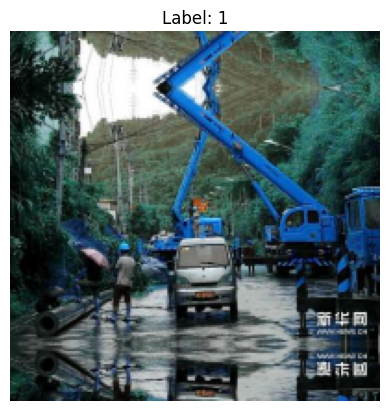

In [10]:
# displaying the first image

display_image(0, images)

The image at index 0 has label 1 and we can see in the image that the worker is wearing a helmet.

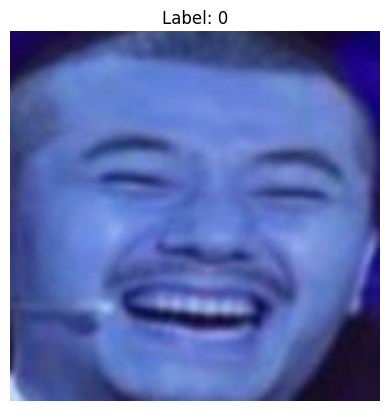

In [ ]:
# displaying another random image
display_image(400, images)

The image at index 400 has label 0 and we can see in the image that the worker is not wearing a helmet.

## Checking for class imbalance


Label
0        320
1        311
Name: count, dtype: int64


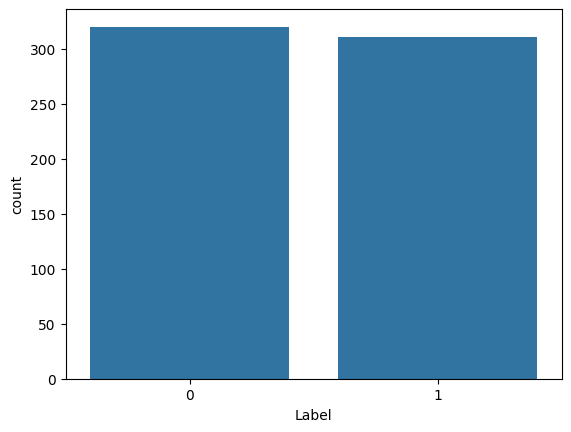

In [ ]:
print(labels.value_counts())

sns.countplot(x=labels.columns[0], data=labels)
plt.show()

- There are 320 counts of '0' labels (corresponding to images 'Without Helmet') and 311 '1' labels (corresponding to images 'With Helmet').
- The counts of labels 0 and 1 are approximately equal. There is no class imbalance in the dataset.

# **Data Preprocessing**

## Converting images to grayscale

We'll use the standard luminosity coefficients used to convert RGB to grayscale. For each pixel, we calculate: grayscale_value = (R * 0.299) + (G * 0.587) + (B * 0.114)

In [52]:
# Luminosity method (matches human perception)
gray_images = np.dot(images[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

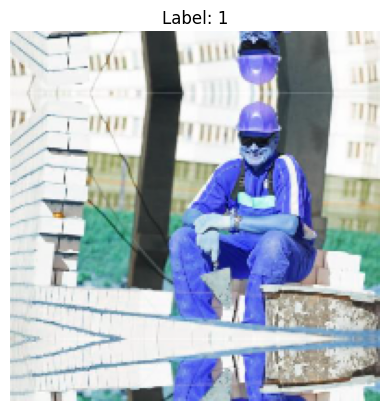

In [53]:
# displaying image 50 in RGB

display_image(50, images)

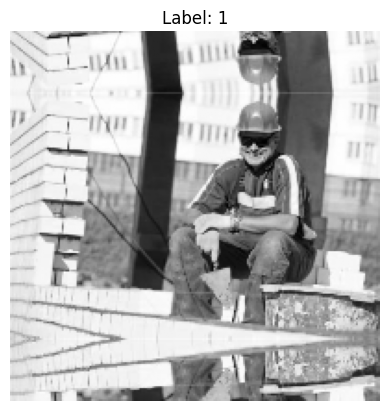

In [54]:
# displaying image 50 after converting it into grayscale

display_image(50, gray_images)

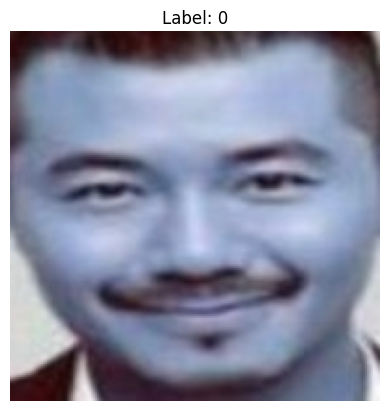

In [ ]:
# displaying image 611 before grayscale conversion

display_image(611, images)

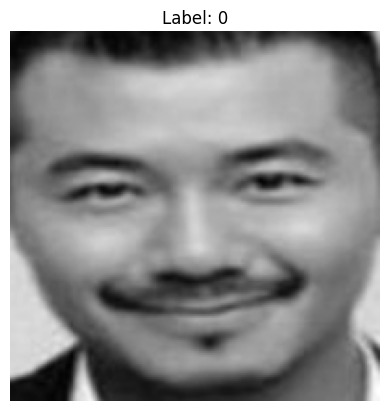

In [ ]:
# displaying image 611 after grayscale conversion

display_image(611, gray_images)

### Normalizing the Images

- We will first normalize the images which makes the next steps easier.
- Since we are dividing each value of the image pixels by 255, there is won't be any data leakage even if the normalization happens before splitting.

In [11]:
images_normalized = images / 255.0

# checking the range of the normalized image pixels
print(f"Value range: {images_normalized.min()} to {images_normalized.max()}")

Value range: 0.0 to 1.0


In [55]:
# normalizing grayscale images

gray_images = gray_images.astype('float32') / 255.0

### Splitting the dataset



split the datasets: 80% for training, 10% for validation and 10% for testing while keeping the ratio of the class labels same in each split.


In [56]:
# splitting the grayscale images for CNN Basic model

X_train, X_temp, y_train, y_temp = train_test_split(gray_images, labels, test_size=0.2, stratify=labels, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [57]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(504, 200, 200) (504, 1)
(63, 200, 200) (63, 1)
(64, 200, 200) (64, 1)


## Utility Functions

In [71]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)


    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [13]:
def plot_confusion_matrix(model, predictors, target):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors).reshape(-1)>0.5

    target = target.to_numpy().reshape(-1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

In [14]:
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Model performance")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

# **1. Basic CNN Model**

Creating a basic CNN network consisting of four convolution layers, activations, batch normalization and max-pooling layers and a fully-connected neural network.

In [73]:
cnn_basic = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(200, 200, 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(16, (3,3), activation='relu', padding='same'),
    BatchNormalization(),

    # converting the output of the last layer into 1d array
    Flatten(),

    # creating a fully connected network with 3 layers and an output layer
    Dense(64, activation='relu'),
    Dropout(0.25),

    Dense(32, activation='relu'),
    Dropout(0.25),

    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [74]:
# compile the above model and view the summary

cnn_basic.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_basic.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 200, 200, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 200, 200, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 100, 100, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 25, 25, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 25, 25, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676,785 (2.58 MB)

 Trainable params: 676,497 (2.58 MB)

 Non-trainable params: 288 (1.12 KB)

In [75]:
# training the model and viewing the progress

cnn_basic_history = cnn_basic.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=15,
                              batch_size=64)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8501 - loss: 0.3038 - val_accuracy: 0.5079 - val_loss: 0.8420
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.9764 - loss: 0.1090 - val_accuracy: 0.5079 - val_loss: 1.2128
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9864 - loss: 0.0452 - val_accuracy: 0.5079 - val_loss: 1.5049
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9823 - loss: 0.0382 - val_accuracy: 0.5079 - val_loss: 2.1772
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9943 - loss: 0.0198 - val_accuracy: 0.5079 - val_loss: 3.3127
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.9923 - loss: 0.0097 - val_accuracy: 0.5079 - val_loss: 4.1877
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9944 - loss: 0.0109 - val_accuracy: 0.5079 - val_loss: 4.5933
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.5079 - val_loss: 4.9897


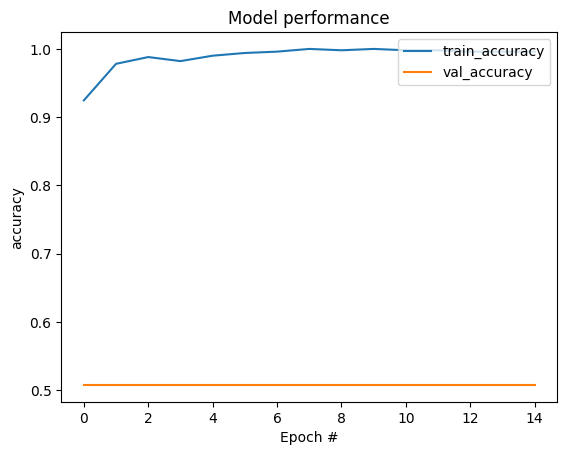

In [76]:
# plotting the model progress

plot_history(cnn_basic_history)

#### Visualizing the predictions

In [77]:
cnn_basic_performance = model_performance_classification(cnn_basic, X_val, y_val)
cnn_basic_performance

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.507937,0.507937,0.257999,0.342189


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


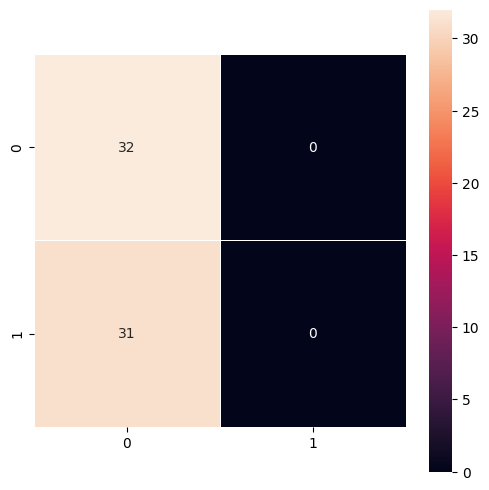

In [78]:
plot_confusion_matrix(cnn_basic, X_val, y_val)

- The model has done well on training data but has performed poorly on the validation data. This shows that the model is overfitting.
- The validtion accuracy has stayed the same throughout the training.
- The model has predicted all the images in the validation data as belonging to class 0.
- The model needs to be improved to correctly predict both the classes.

# **2. VGG-16 Model**

- We'll use a basic VGG-16 model to create another network.
- We'll use the convolution and max-pooling layers of the VGG-16 model and create one output layer to predict the class of the images.
- We will use the original color images(normalized) on the VGG-16 models since the VGG-16 model was designed for color images and works well for color images. Aditionally, we won't be losing any information by keeping the color images. Since safety helmets are bright in color, we can leverage this information along with the model's pre-trained ability to work on color images

In [79]:
# splitting the color(RGB) images into training, validation and testing data

X_train, X_temp, y_train, y_temp = train_test_split(images_normalized, labels, test_size=0.2, stratify=labels, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [80]:
# checking the shape of the training, validation and testing set

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(504, 200, 200, 3) (504, 1)
(63, 200, 200, 3) (63, 1)
(64, 200, 200, 3) (64, 1)


In [81]:
# selecting only the convolution and pooling layers from VGG-16 and specifying the input shape to match our images

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# View model architecture
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

- Since we will be using the pre-trained weights of th VGG-16 model, we'll freeze all the above layers

In [82]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them

for layer in vgg_model.layers:
    layer.trainable = False

In [83]:
# checking if all the layers till the last pooling layer are freezed

for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_layer_7 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [84]:
# creating the basic VGG model with only a output neuron after the last pooling layer

vgg_basic = Sequential([

    # using all the convolution and pooling layers
    vgg_model,

    # reshaping the output of the previous layer into a 1d array
    Flatten(),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

In [85]:
# compiling the vgg basic model and viewing it's summary

vgg_basic.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg_basic.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │        18,433 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,733,121 (56.20 MB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [86]:
# training the Basic VGG model

vgg_basic_history = vgg_basic.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=10,
                              batch_size=32)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.8559 - loss: 0.3222 - val_accuracy: 1.0000 - val_loss: 0.0104
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.

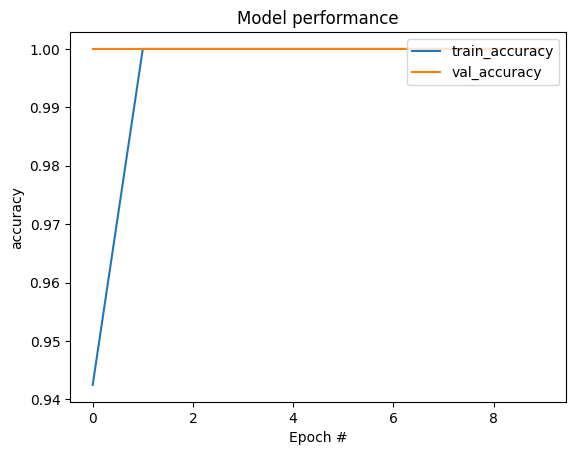

In [87]:
plot_history(vgg_basic_history)

In [88]:
vgg_basic_performance = model_performance_classification(vgg_basic, X_val, y_val)
vgg_basic_performance

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


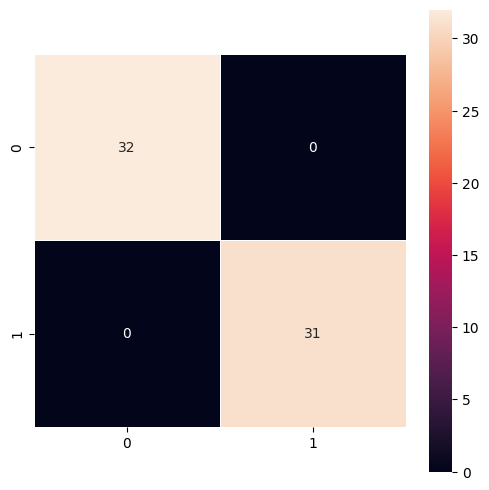

In [89]:
plot_confusion_matrix(vgg_basic, X_val, y_val)

- The basic VGG-16 model has done very well on both the training and the validation data.
- The performance has significantly improved compared to the basic CNN model.
- After the first epoch, the training accuracy is constantly 100% till the last epoch.
- The model is not overfitting since the validation accuaracy is also 100%.

# **3. VGG-16 with FFNN**

- Now, we'll add additional layers into the neural network used after the last pooling layer.
- We'll add two more fully connected layers with dropouts to regularize the model and prevent overfitting.

In [110]:
vgg_ffnn = Sequential([
    vgg_model,
    Flatten(),

    # First dense layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.005)),
    # BatchNormalization(),
    Dropout(0.3),

    # Second dense layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

In [111]:
# compiling the VGG-16 model with FFNN and viewing it's summary

vgg_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg_ffnn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,305,761 (58.39 MB)

 Trainable params: 591,009 (2.25 MB)

 Non-trainable params: 14,714,752 (56.13 MB)

In [112]:
# training the VGG-16 model with feed forward neural network

vgg_ffnn_history = vgg_ffnn.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=15,
                              batch_size=32)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 309ms/step - accuracy: 0.8291 - loss: 1.2584 - val_accuracy: 1.0000 - val_loss: 0.7967
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 0.9873 - loss: 0.8712 - val_accuracy: 1.0000 - val_loss: 0.6927
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - accuracy: 1.0000 - loss: 0.7355 - val_accuracy: 1.0000 - val_loss: 0.6007
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9672 - loss: 0.6493 - val_accuracy: 1.0000 - val_loss: 0.5235
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - accuracy: 1.0000 - loss: 0.5464 - val_accuracy: 1.0000 - val_loss: 0.4592
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.9998 - loss: 0.4675 - val_accuracy: 1.0000 - val_loss: 0.4033
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9934 - loss: 0.4148 - val_accuracy: 1.0000 - val_loss: 0.3519
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.9838 - loss: 0.3715 - val_accuracy: 1.

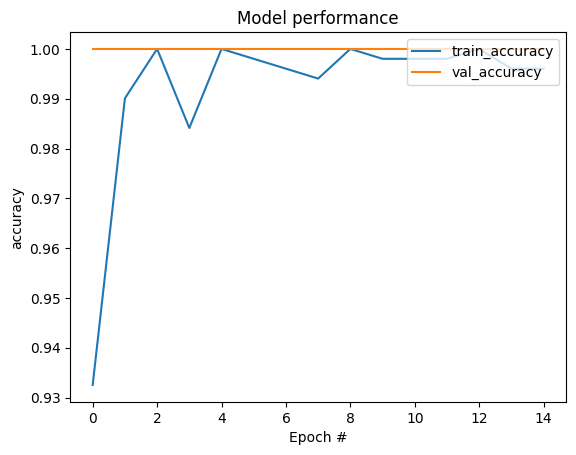

In [113]:
plot_history(vgg_ffnn_history)

In [114]:
vgg_ffnn_performance = model_performance_classification(vgg_ffnn, X_val, y_val)
vgg_ffnn_performance

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


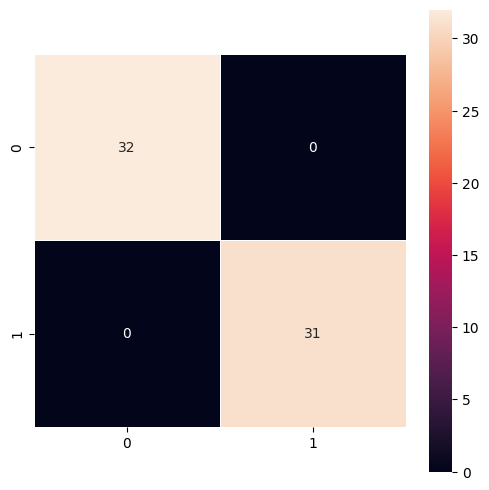

In [115]:
plot_confusion_matrix(vgg_ffnn, X_val, y_val);

- The model has also performed well.
- There are minor fluctuations in the training set which is normal for small datasets.
- The validation accuracy is 100% and the training accuracy is close to 100%.

# **VGG - 16 with Data Augmentation**

- Now, we'll train the VGG-16 model on the augmented images.
- Since the original dataset is small, it can be helpful to generate more images from the existing ones and training the model on these.

In [96]:
# Create an ImageDataGenerator instance for data augmentation
train_datagen = ImageDataGenerator(
    horizontal_flip=True,  # Randomly flips images horizontally (left-right)
    vertical_flip=False,  # No vertical flipping (avoids unnatural distortions)

    height_shift_range=0.2,  # Randomly shifts images vertically by up to 20% of height
    width_shift_range=0.2,  # Randomly shifts images horizontally by up to 20% of width

    rotation_range=20,  # Rotates images randomly within a range of ±20 degrees
    shear_range=0.3,  # Applies shearing transformation up to 30% (tilts images)
    zoom_range=0.3  # Random zoom in/out by up to 30% to increase variance
)

In [97]:
# Create an augmented training data generator
train_generator = train_datagen.flow(
    X_train, y_train,  # Input images and labels
    batch_size=32,  # Number of images processed per batch during training
    shuffle=True,  # Ensures randomness in batches (helps generalization)
    seed=42  # Fixed seed for reproducibility (same shuffling each run)
)

In [98]:
vgg_augm = Sequential([
    vgg_model,
    Flatten(),

    # First dense layer with regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.003)),
    BatchNormalization(),
    Dropout(0.2),

    # Second dense layer
    Dense(32, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

In [99]:
vgg_augm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg_augm.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │       589,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,305,889 (58.39 MB)

 Trainable params: 591,073 (2.25 MB)

 Non-trainable params: 14,714,816 (56.13 MB)

In [100]:
vgg_augm_history = vgg_augm.fit(
    train_generator,  # Training data with augmentation

    validation_data=(X_val, y_val),  # Validation dataset (no augmentation)

    epochs=15,  # Number of full passes through the dataset

    steps_per_epoch=len(X_train) // 32  # Number of batches processed per epoch
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 650ms/step - accuracy: 0.8143 - loss: 0.5734 - val_accuracy: 0.8730 - val_loss: 0.4691
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.3154 - val_accuracy: 0.8889 - val_loss: 0.4538
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 311ms/step - accuracy: 0.9978 - loss: 0.2466 - val_accuracy: 0.9048 - val_loss: 0.4134
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.2058 - val_accuracy: 0.9048 - val_loss: 0.4001
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.9974 - loss: 0.2223 - val_accuracy: 0.9841 - val_loss: 0.2589
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.1986 - val_accuracy: 0.9841 - val_loss: 0.2531
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.9977 - loss: 0.1918 - val_accuracy: 1.0000 - val_loss: 0.1821
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.1833 - val_accuracy: 1.00

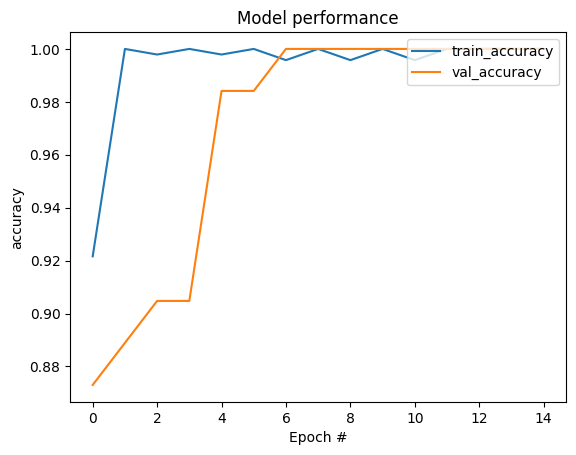

In [101]:
plot_history(vgg_augm_history)

In [102]:
vgg_augm_performance = model_performance_classification(vgg_augm, X_val, y_val)
vgg_augm_performance

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


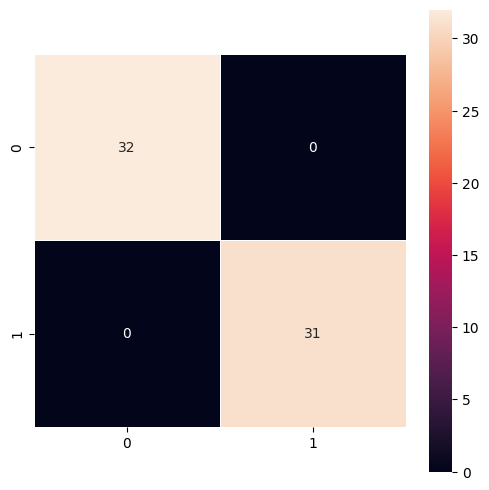

In [103]:
plot_confusion_matrix(vgg_augm, X_val, y_val);

- The above model has also performed well both on training and validation data showing that it generalizes well.
- similar to the previous model, there are minor fluctuations in the performance on the training data and the accuracy is 100% on both the training data and the validation data.

# **Model Performance Comparison and Final Model Selection**

In [117]:
# validation performance comparison
models_val_comp_df = pd.concat(
    [
        cnn_basic_performance.T,
        vgg_basic_performance.T,
        vgg_ffnn_performance.T,
        vgg_augm_performance.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
 "CNN Basic"," VGG-16 Basic", "VGG-16 FFNN","VGG-16 Augmented"
]

In [105]:
# printing the comparision table for validation set
models_val_comp_df

,CNN Basic,VGG-16 Basic,VGG-16 FFNN,VGG-16 Augmented
Accuracy,0.507937,1.0,1.0,1.0
Recall,0.507937,1.0,1.0,1.0
Precision,0.257999,1.0,1.0,1.0
F1 Score,0.342189,1.0,1.0,1.0


- All the three VGG-16 models (Basic, FFNN, Augmented) have performed equally well on the validation data with 100% accuracy, 100% recall and 100% precision.
- Therefore, we'll check the performance of the these three models on the test data.

## Test Performance

In [106]:
vgg_basic_test_perf = model_performance_classification(vgg_basic, X_test, y_test)
vgg_basic_test_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [107]:
vgg_ffnn_test_perf = model_performance_classification(vgg_ffnn, X_test, y_test)
vgg_ffnn_test_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [108]:
vgg_augm_test_perf = model_performance_classification(vgg_augm, X_test, y_test)
vgg_augm_test_perf

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


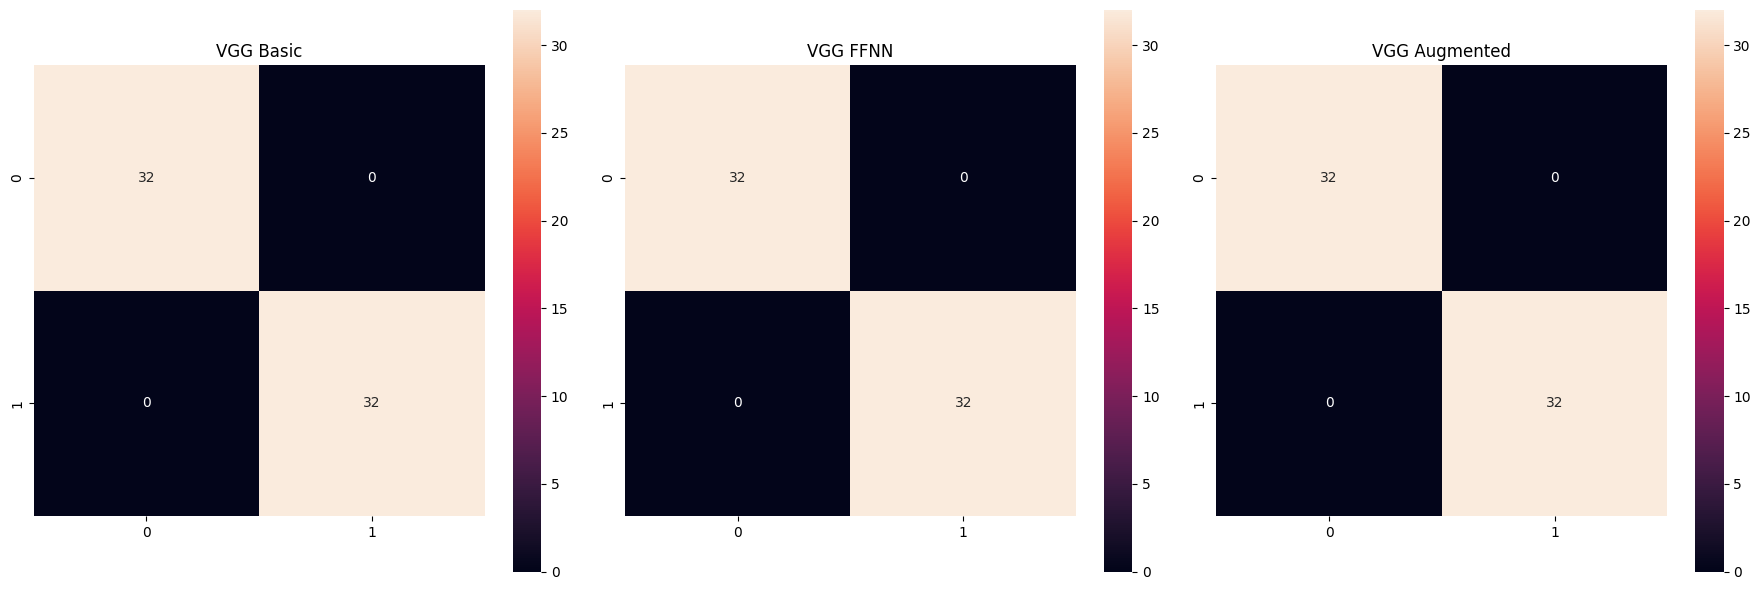

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = [vgg_basic, vgg_ffnn, vgg_augm]
titles = ['VGG Basic', 'VGG FFNN', 'VGG Augmented']

for ax, model, title in zip(axes, models, titles):
    pred = model.predict(X_test).reshape(-1) > 0.5
    cm = tf.math.confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', square=True, ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

- Again, all the three models have performed extremely well on the test data by predicting all the images correctly without any mistakes.

# **Actionable Insights & Recommendations**

- The dataset had nearly equal instances of each class (e.g., 0: 320, 1: 311).
 This ensured that the model wasn’t biased toward any class, improving fairness and interpretability of results.
- Normalization (pixel values divided by 255) was applied for both grayscale and color images to bring values into [0, 1] range, aiding faster and more stable model convergence.
- For the Basic CNN model, the color images were converted into grayscale images.
- The Basic CNN model didn't perform well. The model was overfitting and was predicting all the images to be of label 0.
- Three models were built upon VGG-16: VGG-16 Basic, VGG-16 with FFNN and VGG-16 with Augmented data: The Basic model used only the Convolution and Pooling layers from the VGG-16 model with a single neuron for the output in the neural network. The FFNN model used more dense layers and the last model(also used dense layers) used augmented images during training.
- All these three models performed greately both on the training data and the validation and the test data.
- All the three models predicted all the images correctly in the validation and the final test set. They got prefect accuracy, precision and F1-score.
- The same VGG models can also be trained on grayscale images if only grayscale images are available. The models can also be trained of images of different sizes.
- More images can be used to train the models if they are available in the future.
- The VGG models are expected to do well during production. The Basic VGG model needs less computational power since it has only ~19,000 trainable parameters while the other two VGG models have ~590,000 trainable parameters